In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/labs/shahlab/projects/lguo/temp_ds_shift_robustness/clmbr/experiments/baseline/artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [3]:
cmap = 'viridis'

y_axis = {
    'auc':{
        'lim':[-0.18, 0.18],
        'lim_raw':[0.65,1],
        'label':'AUROC'
    },
    'auprc_c':{
        'lim':[-0.25, 0.25],
        'lim_raw':[0,.75],
        'label':'Calibrate\nAUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.06],
        'lim_raw':[0,0.08],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.2],
        'label':'BCE Loss'
    }
}

models = {
    'lr':'Logistic Regression',
    'gbm':'LightGBM'
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09\n12',
}

#### ID Performance

In [4]:
from utils_visualize import get_result_table

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}


df = get_result_table(artifacts_fpath,train_years,tasks,metrics,models)
print("ID Performance of LR Models Trained on 09-12")
display(df)

ID Performance of LR Models Trained on 09-12


Train Group                                       09\n12                      
Model                                Logistic Regression              LightGBM
Task                   Metric                                                 
In-Hospital Mortality  AUROC        0.898 (0.877, 0.919)  0.906 (0.883, 0.923)
                       AUPRC        0.233 (0.182, 0.292)  0.234 (0.182, 0.294)
                       Calibration    0.002 (0.0, 0.004)  0.005 (0.002, 0.007)
LOS > 7 Days           AUROC        0.825 (0.814, 0.835)  0.844 (0.834, 0.854)
                       AUPRC         0.55 (0.525, 0.575)  0.592 (0.568, 0.618)
                       Calibration  0.004 (0.001, 0.009)  0.009 (0.003, 0.016)
Readmission in 30 Days AUROC         0.792 (0.77, 0.811)  0.795 (0.776, 0.816)
                       AUPRC        0.273 (0.235, 0.316)  0.265 (0.223, 0.308)
                       Calibration  0.008 (0.005, 0.012)  0.007 (0.004, 0.012)
Admission to ICU       AUROC        0.871 (0.842, 0.896)  0.873 (0.844, 0.899)
                       AUPRC        0.219 (0.165, 0.283)  0.258 (0.192, 0.327)
                       Calibration  0.004 (0.001, 0.006)  0.006 (0.004, 0.009)

#### Performance of Logistic Regression Models trained on count-based representations from 2009 - 2021, during which 2009-2012 are the in-distribution years and 2013-2021 are the out-of-distribution years.
- Fig 2 in manuscript

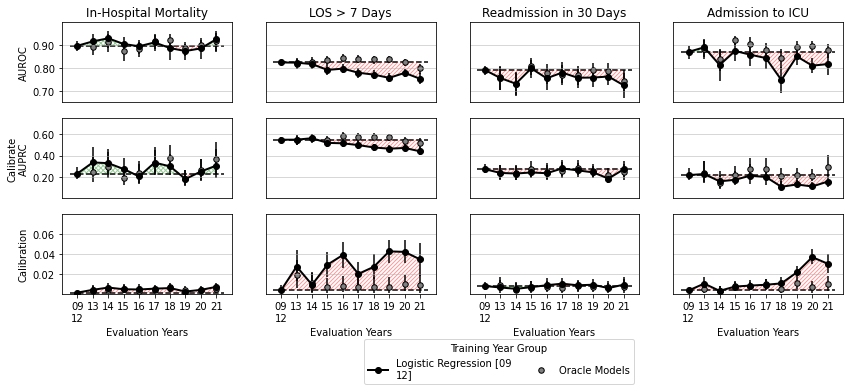

In [5]:
from utils_visualize import plot_raw_ood_perf

metrics = {
    'auc':'AUROC',
    'auprc_c':'Calibrated\nAUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

models = {
    'lr':'Logistic Regression',
}

plot_raw_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    models,
    y_axis,
    legend_bbox_to_anchor=(-0.2,-0.5),
    legend_ncols=3,
    plot_oracles=True,
    plot_legend=True,
    figsize=(14,5),
    #save_path='figs/base_lr.png'
)

#### Performance of LightGBM Models trained on count-based representations from 2009 - 2021, during which 2009-2012 are the in-distribution years and 2013-2021 are the out-of-distribution years.

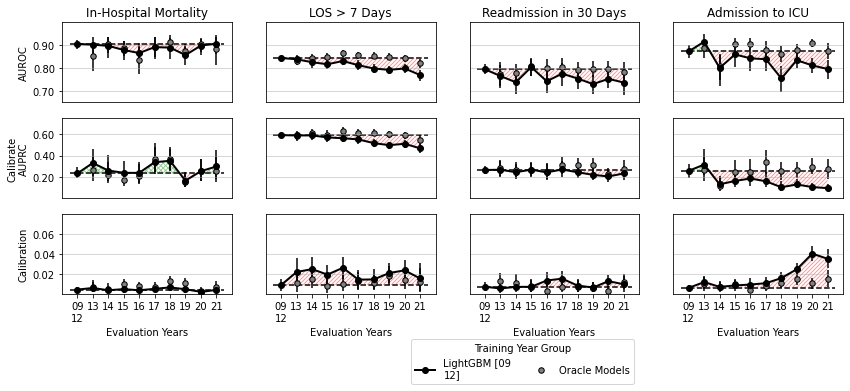

In [6]:
from utils_visualize import plot_raw_ood_perf

metrics = {
    'auc':'AUROC',
    'auprc_c':'Calibrated\nAUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

models = {
    'gbm':'LightGBM',
}

plot_raw_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    models,
    y_axis,
    legend_bbox_to_anchor=(-0.2,-0.5),
    legend_ncols=3,
    plot_oracles=True,
    plot_legend=True,
    figsize=(14,5),
    #save_path='figs/base_gbm.png'
)